In [109]:
import pandas as pd
import requests
import yfinance as yf
import numpy as np
import time
from tqdm import tqdm
import psycopg2
from datetime import datetime, timedelta
DB_HOST = 'localhost'
DB_NAME = 'tw'
DB_USER = 'mini'
DB_PASS = 'buddyrich134'
def get_db_connection():
    conn = psycopg2.connect(host=DB_HOST, dbname=DB_NAME, user=DB_USER, password=DB_PASS)
    return conn


conn = get_db_connection()
cursor = conn.cursor()
uri_pe = "https://www.twse.com.tw/rwd/zh/afterTrading/BWIBBU_d?date=20240809&selectType=ALL"

res = requests.get(uri_pe)
stock_l = res.json()['data']
stock_list = [i[0] for i in stock_l]

"total len of twse stocks: ", len(stock_list)

('total len of twse stocks: ', 1016)

In [175]:
cursor.execute("SELECT DISTINCT code from public.stock_price;")
conn.commit()
res = cursor.fetchall()
code_list = [i[0] for i in res]
for code in code_list[0:5]:

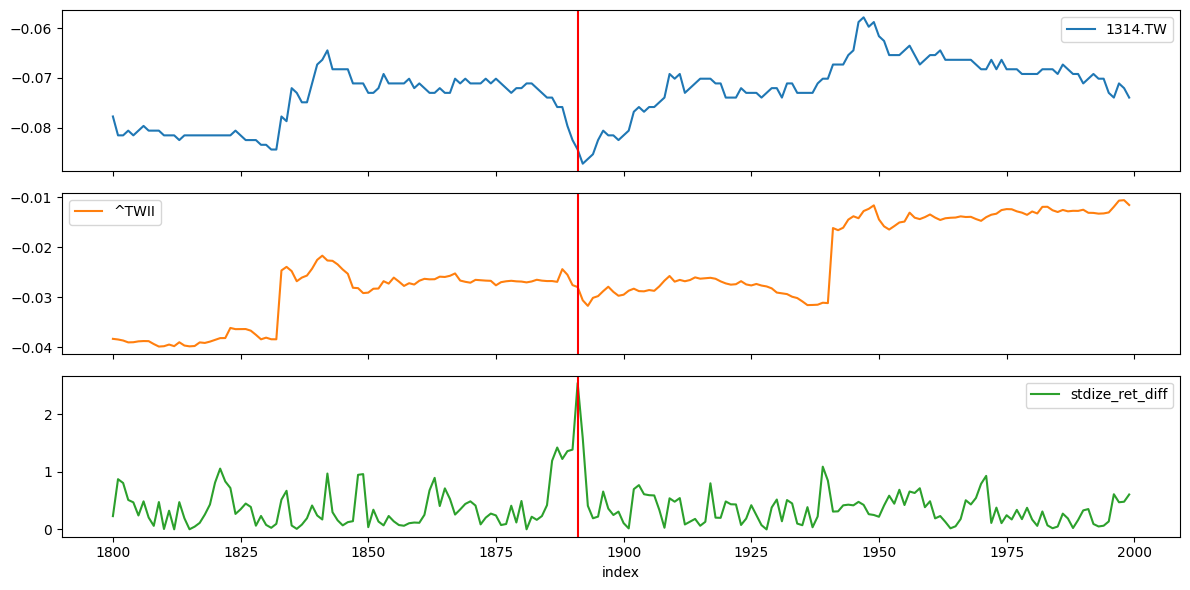

code,1314.TW,^TWII,ret_diff,ret_diff_std,ret_diff_mean,stdize_ret_diff,index,1314.TW_lag60,TWII_lag60,target_60mins
index,,,,,,,,,,
1891,-0.08436,-0.027973,-0.00167,0.07879,-0.201604,2.537562,1891,-0.069194,-0.026547,0.015166


In [170]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
code = '1314.TW'
rolling = 5
cursor.execute(f"SELECT * from public.stock_price where code in ('{code}', '^TWII')")
conn.commit()
res = cursor.fetchall()
df = pd.DataFrame(res)
df.columns = ['da','code', 'cl', 'hi', 'lo', 'op', 'vol', 'adj']
pivoted = df.pivot(columns='code', values='cl', index='da')
pivoted.ffill()
ret = pivoted.pct_change()
ret['ret_diff'] = ret[code] - ret['^TWII']
ret['ret_diff_std'] = ret['ret_diff'].rolling(rolling).std() * 100
ret['ret_diff_mean'] = ret['ret_diff'].rolling(rolling).mean() * 100
ret['stdize_ret_diff'] = abs((ret['ret_diff'] - ret['ret_diff_mean'])/ret['ret_diff_std'])
ret[code] = (1 + ret[code]).cumprod() - 1
ret['^TWII'] = (1 + ret["^TWII"]).cumprod() - 1

ret['index'] = [i for i in range(len(ret))]
ret.set_index('index', inplace=True, drop=False)

# check raise
ret[f'{code}_lag60'] = ret[code].shift(-20)
ret[f'TWII_lag60'] = ret["^TWII"].shift(-20)
ret['target_60mins'] = ret[f'{code}_lag60'] - ret[code]
ret['signal_defineby_prev_ret'] = 
# specific print
start = 1800
# end = len(ret)
end = 2000

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 6), sharex=True)
ret.iloc[start:end, [0, 1, 5]].plot(ax=axes, subplots=True, legend=True)
for index, row in ret[ret['stdize_ret_diff'] >= 2].iterrows():  
    if row['index'] >= start and row['index'] <= end:
        for ax in axes:
            ax.axvline(row['index'], color='red')
plt.tight_layout()
plt.show()

# check to long or short

ret[ret['stdize_ret_diff'] >= 2]

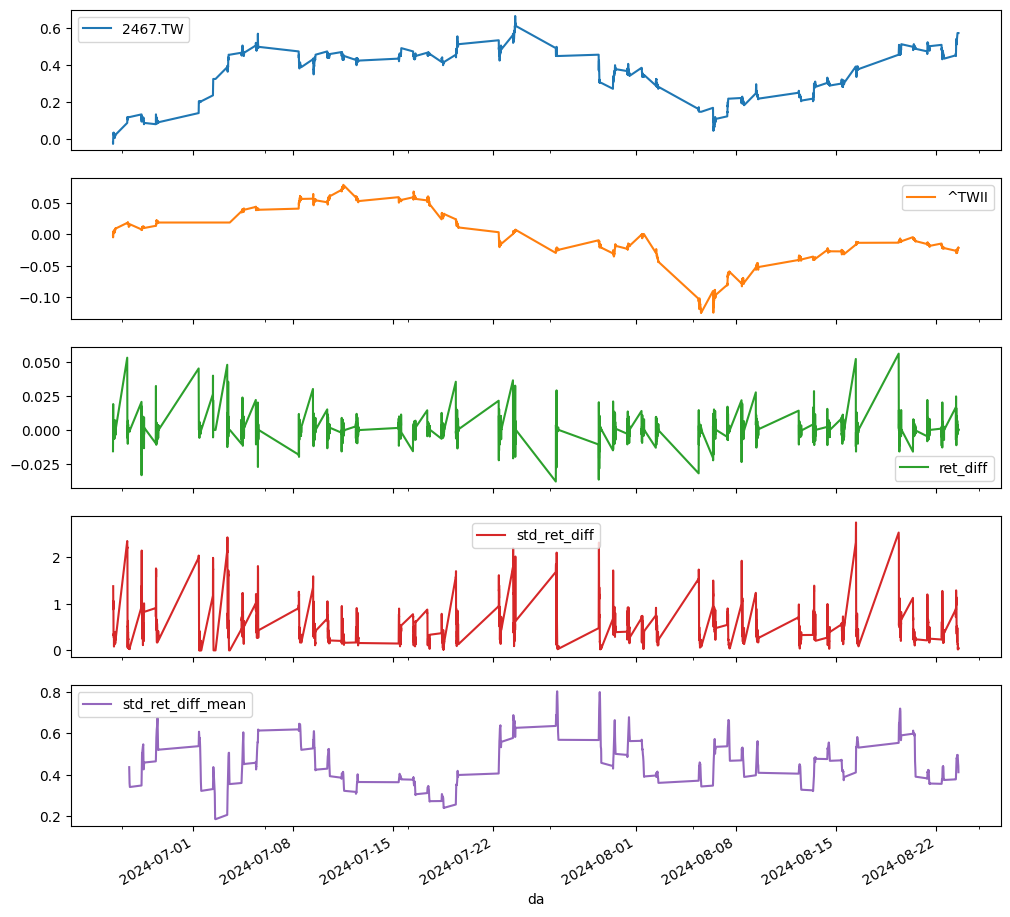

In [105]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
code = '2467.TW'
cursor.execute(f"SELECT * from public.stock_price where code in ('{code}', '^TWII')")
conn.commit()
res = cursor.fetchall()
df = pd.DataFrame(res)
df.columns = ['da','code', 'cl', 'hi', 'lo', 'op', 'vol', 'adj']
pivoted = df.pivot(columns='code', values='cl', index='da')
pivoted.ffill()
ret = pivoted.pct_change()
ret['ret_diff'] = ret[code] - ret['^TWII']
ret['std_ret_diff'] = ret['ret_diff'].rolling(5).std() * 100
ret['std_ret_diff_mean'] = ret['std_ret_diff'].rolling(90).mean()
ret[code] = (1 + ret[code]).cumprod() - 1
ret['^TWII'] = (1 + ret["^TWII"]).cumprod() - 1

ret.iloc[:, :].plot(subplots=True, figsize=(12, 12))
plt.show()

In [93]:
ret['signal'] = ret['']

code,1234.TW,^TWII,ret_diff,std_ret_diff
da,,,,
2024-06-25 09:00:00,NaN,NaN,NaN,NaN
2024-06-25 09:05:00,-0.003319,-0.001947,-0.001372,NaN
2024-06-25 09:10:00,-0.007743,-0.003851,-0.002531,NaN
2024-06-25 09:15:00,-0.008850,-0.004608,-0.000355,NaN
2024-06-25 09:20:00,-0.008850,-0.003823,-0.000789,NaN
...,...,...,...,...
2024-08-23 13:05:00,-0.063053,-0.021704,-0.000263,0.060815
2024-08-23 13:10:00,-0.063053,-0.021631,-0.000075,0.035791
2024-08-23 13:15:00,-0.064159,-0.021126,-0.001697,0.089685


/var/folders/8t/5pbz9ymx2lg7rmzs81jgbp2h0000gn/T/ipykernel_92966/3934955911.py:9: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  ret = pivoted.pct_change()


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

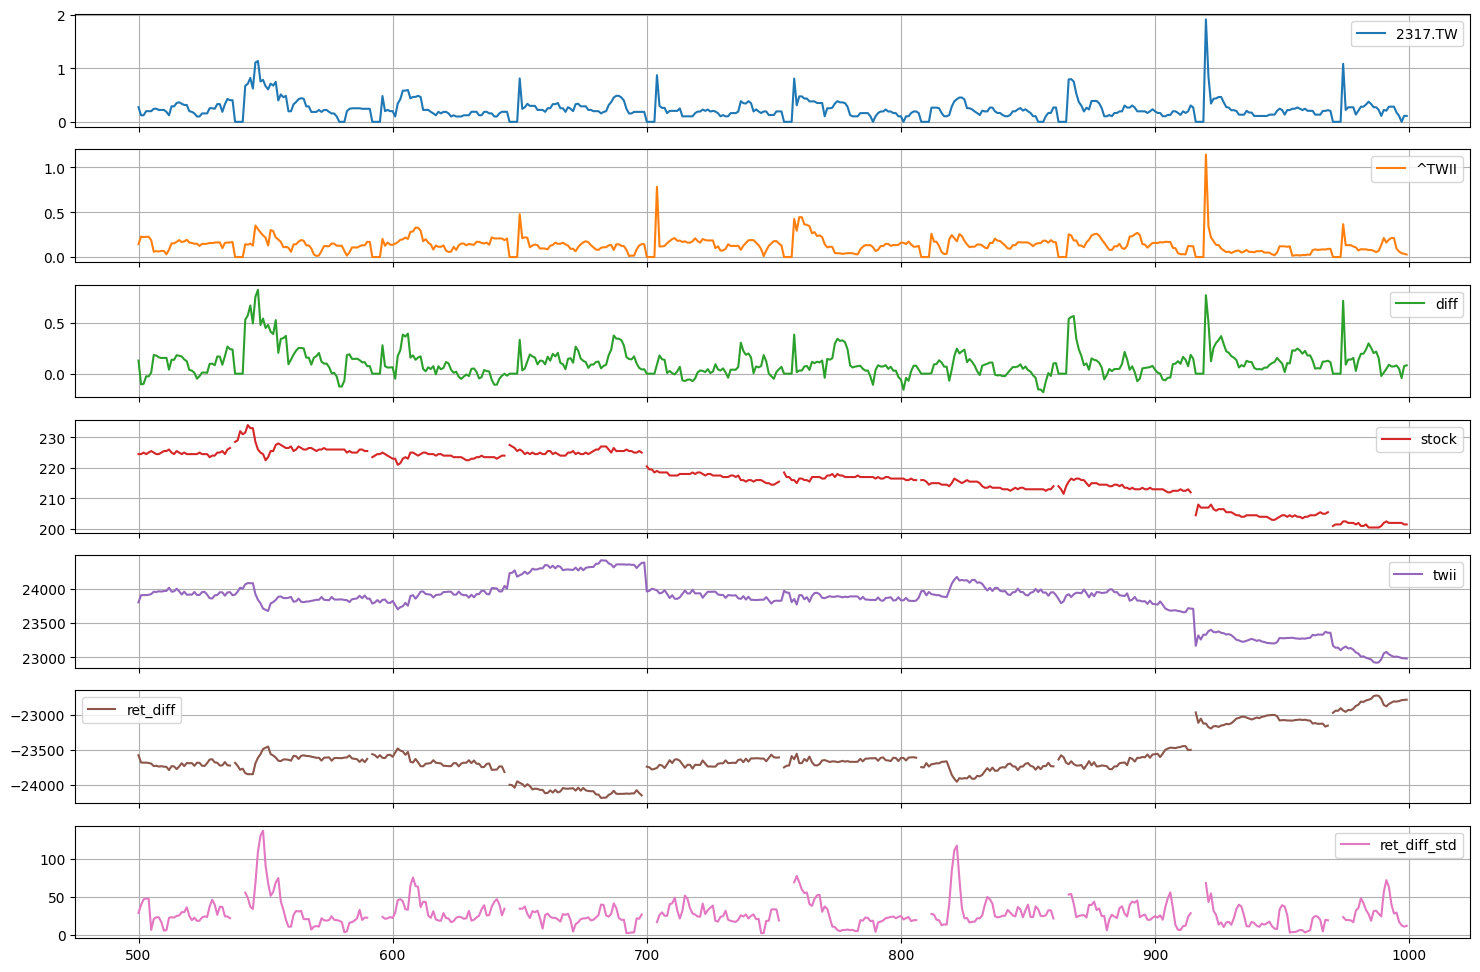

In [77]:
code = '2317.TW'
cursor.execute(f"SELECT * from public.stock_price where code in ('{code}', '^TWII')")
conn.commit()
res = cursor.fetchall()
df = pd.DataFrame(res)
df.columns = ['da','code', 'cl', 'hi', 'lo', 'op', 'vol', 'adj']
pivoted = df.pivot(columns='code', values='cl', index='da')
pivoted.ffill()
ret = pivoted.pct_change()
# mean = ret.rolling(5).mean()
# std = ret.rolling(5).std() * 100
# std['diff'] = std[code] - std['^TWII']
# std['stock'] = pivoted[code]
# std.reset_index(drop=True, inplace=True)
# stdize = (ret - mean)/std
# std.iloc[-500:, :].plot(subplots=True, kind='line', figsize=(18, 12), grid=True)

ret['cal_da'] = ret.index.strftime("%Y-%m-%d")
std_df = []
for index, df in ret.groupby('cal_da'):
    std = df.iloc[:, :2].rolling(5).std()
    std_df.append(std)
final = pd.concat(std_df).fillna(0.0) * 100
final['diff'] = final[code] - final['^TWII']
final['stock'] = pivoted[code]
final['twii'] = pivoted["^TWII"]
final['ret_diff'] = final['stock'] - final['twii']
final['ret_diff_std'] = final['ret_diff'].rolling(5).std()
final.reset_index(drop=True, inplace=True)
final.iloc[500:1000, :].plot(subplots=True, kind='line', figsize=(18, 12), grid=True)

<Axes: xlabel='da'>

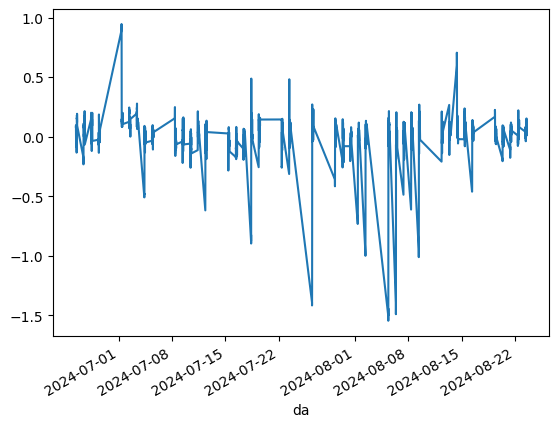

In [41]:
stds = std.dropna().copy()
stds['diff'] = stds['1101.TW'] - stds['^TWII']
stds['diff'].plot()